In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
path = './'

data = pd.read_excel(path + 'oil_data_for_tree.xlsx')
data.head()

,uid,oil_actv_dt,create_dt,total_oil_cnt,pay_amount_total,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-19,2018-08-17,275.0,48295495.4,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-19,2018-08-16,275.0,48295495.4,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-19,2018-08-15,275.0,48295495.4,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-19,2018-08-14,275.0,48295495.4,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-19,2018-08-13,275.0,48295495.4,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3


In [3]:
set(data.class_new)

{'A', 'B', 'C', 'D', 'E', 'F'}

- org_lst does not require special transformations, just remove duplicates.
- agg_lst performs aggregation for numeric variables.
- dstc_lst counts for text variables.

In [5]:
org_lst = ['uid','create_dt','oil_actv_dt','class_new','bad_ind']
agg_lst = ['oil_amount','discount_amount','sale_amount','amount','pay_amount','coupon_amount','payment_coupon_amount']
dstc_lst = ['channel_code','oil_code','scene','source_app','call_source']

In [6]:
# Data Restructuring

df = data[org_lst].copy()
df[agg_lst] = data[agg_lst].copy()
df[dstc_lst] = data[dstc_lst].copy()

In [7]:
#  Review missing value
df.isna().sum()

uid                         0
create_dt                4944
oil_actv_dt                 0
class_new                   0
bad_ind                     0
oil_amount               4944
discount_amount          4944
sale_amount              4944
amount                   4944
pay_amount               4944
coupon_amount            4944
payment_coupon_amount    4946
channel_code                0
oil_code                    0
scene                       0
source_app                  0
call_source                 0
dtype: int64

describe basic variables

In [8]:
df.describe()

,create_dt,oil_actv_dt,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
count,45665,50609,50609.000000,45665.000000,4.566500e+04,4.566500e+04,4.566500e+04,4.566500e+04,45665.000000,45663.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000
mean,2018-06-09 01:47:56.452425472,2018-09-05 00:56:50.998043904,0.017764,425.376107,1.832017e+05,1.881283e+05,1.808673e+05,9.043344e+05,0.576853,149.395397,1.476378,1.617894,1.906519,0.306072,2.900729
min,2017-05-16 00:00:00,2018-04-02 00:00:00,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-04-29 00:00:00,2018-08-12 00:00:00,0.000000,175.440000,6.039100e+04,6.200100e+04,5.976100e+04,2.988010e+05,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000
50%,2018-06-23 00:00:00,2018-09-09 00:00:00,0.000000,336.160000,1.229310e+05,1.279240e+05,1.209610e+05,6.048010e+05,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000
75%,2018-08-07 00:00:00,2018-09-30 00:00:00,0.000000,557.600000,2.399050e+05,2.454010e+05,2.360790e+05,1.180391e+06,1.000000,100.000000,1.000000,0.000000,2.000000,0.000000,3.000000
max,2018-10-29 00:00:00,2018-10-31 00:00:00,1.000000,7952.820000,3.916081e+06,3.996001e+06,3.851081e+06,1.925540e+07,1.000000,50000.000000,6.000000,9.000000,2.000000,3.000000,4.000000
std,NaN,NaN,0.132093,400.596244,2.007574e+05,2.048742e+05,1.977035e+05,9.885168e+05,0.494064,605.138823,1.511470,3.074166,0.367280,0.893682,0.726231


- Fill in creat_dt using oil_actv_dt as a substitute and extract data from the last 6 months.
- When constructing variables, avoid directly accumulating all historical data.
- Otherwise, as time progresses, the variable distribution will undergo significant changes.

In [9]:
def time_isna(x,y):
    if str(x) == 'NaT':
        x = y
    else:
        x = x
    return x
df2 = df.sort_values(['uid','create_dt'],ascending = False)
df2['create_dt'] = df2.apply(lambda x: time_isna(x.create_dt,x.oil_actv_dt),axis = 1)
df2['dtn'] = (df2.oil_actv_dt - df2.create_dt).apply(lambda x :x.days)
df = df2[df2['dtn']<180]
df.head()

,uid,create_dt,oil_actv_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source,dtn
50608,B96436391985035703,2018-10-08,2018-10-08,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50607,B96436391984693397,2018-10-11,2018-10-11,E,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50606,B96436391977217468,2018-10-17,2018-10-17,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50605,B96436391976480892,2018-09-28,2018-09-28,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50604,B96436391972106043,2018-10-19,2018-10-19,A,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0


- Calculate the maximum interval of historical loan days for the org_list variable.
- Remove duplicates afterward.

In [10]:
base = df[org_lst]
base['dtn'] = df['dtn']
base = base.sort_values(['uid','create_dt'],ascending = False)
base = base.drop_duplicates(['uid'],keep = 'first')
base.shape

/var/folders/9_/rf193zn966s8h34lcd04pzzc0000gn/T/ipykernel_14608/897005539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['dtn'] = df['dtn']


(11099, 6)

Perform Variable Derivation

Variable derivation involves creating new features or variables based on existing data to enhance the analytical or predictive power of a model. 

In [13]:
gn = pd.DataFrame()
for i in agg_lst:
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:len(df[i])).reset_index())
    tp.columns = ['uid',i + '_cnt']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.where(df[i]>0,1,0).sum()).reset_index())
    tp.columns = ['uid',i + '_num']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nansum(df[i])).reset_index())
    tp.columns = ['uid',i + '_tot']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmean(df[i])).reset_index())
    tp.columns = ['uid',i + '_avg']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmax(df[i])).reset_index())
    tp.columns = ['uid',i + '_max']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmin(df[i])).reset_index())
    tp.columns = ['uid',i + '_min']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanvar(df[i])).reset_index())
    tp.columns = ['uid',i + '_var']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmax(df[i]) -np.nanmin(df[i]) ).reset_index())
    tp.columns = ['uid',i + '_var']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmean(df[i])/max(np.nanvar(df[i]),1)).reset_index())
    tp.columns = ['uid',i + '_var']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')

/var/folders/9_/rf193zn966s8h34lcd04pzzc0000gn/T/ipykernel_14608/1652158809.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tp = pd.DataFrame(df.groupby('uid').apply(lambda df:len(df[i])).reset_index())
/var/folders/9_/rf193zn966s8h34lcd04pzzc0000gn/T/ipykernel_14608/1652158809.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.where(df[i]>0,1,0).s

Calculate the distinct count for variables in dstc_lst

In [14]:
gc = pd.DataFrame()
for i in dstc_lst:
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df: len(set(df[i]))).reset_index())
    tp.columns = ['uid',i + '_dstc']
    if gc.empty == True:
        gc = tp
    else:
        gc = pd.merge(gc,tp,on = 'uid',how = 'left')

/var/folders/9_/rf193zn966s8h34lcd04pzzc0000gn/T/ipykernel_14608/529735933.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tp = pd.DataFrame(df.groupby('uid').apply(lambda df: len(set(df[i]))).reset_index())
/var/folders/9_/rf193zn966s8h34lcd04pzzc0000gn/T/ipykernel_14608/529735933.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tp = pd.DataFrame(df.groupby('uid').apply(lambda df: len(set(df[i]))).r

Combine variables together

In [15]:
fn = pd.merge(base,gn,on= 'uid')
fn = pd.merge(fn,gc,on= 'uid') 
fn.shape

(11099, 74)

In [16]:
fn = fn.fillna(0)

In [17]:
fn.head(100)

,uid,create_dt,oil_actv_dt,class_new,bad_ind,dtn,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,...,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var_x,payment_coupon_amount_var_y,payment_coupon_amount_var,channel_code_dstc,oil_code_dstc,scene_dstc,source_app_dstc,call_source_dstc
0,B96436391985035703,2018-10-08,2018-10-08,B,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,B96436391984693397,2018-10-11,2018-10-11,E,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,B96436391977217468,2018-10-17,2018-10-17,B,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,B96436391976480892,2018-09-28,2018-09-28,B,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,B96436391972106043,2018-10-19,2018-10-19,A,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B96117370332355190,2018-10-19,2018-10-19,B,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
96,B96117370330101658,2018-10-12,2018-10-12,B,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
97,B96117370330066347,2018-10-01,2018-10-01,D,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
98,B96117370328724350,2018-09-20,2018-09-20,C,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


训练决策树模型

In [37]:
x = fn.drop(['uid','oil_actv_dt','create_dt','bad_ind','class_new'],axis = 1)
y = fn.bad_ind.copy()
from sklearn import tree

dtree = tree.DecisionTreeRegressor(max_depth = 2,min_samples_leaf = 500,min_samples_split = 5000)
dtree = dtree.fit(x,y)

Output the decision tree, and make decision

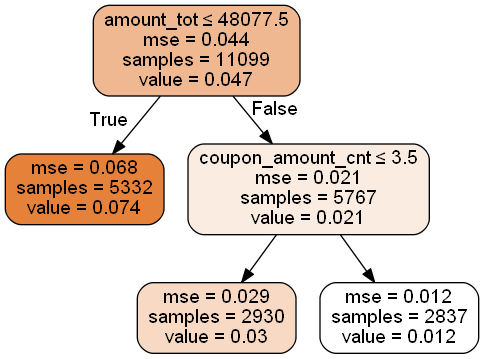

In [49]:
import pydotplus 
from IPython.display import Image
from sklearn.externals.six import StringIO
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
with open(path + "dt.dot", "w") as f:
    tree.export_graphviz(dtree, out_file=f)
dot_data = StringIO()
tree.export_graphviz(dtree, out_file=dot_data,
                         feature_names=x.columns,
                         class_names=['bad_ind'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

ecisions Based on the Decision Tree
 1. Key Features:
- amount_tot (Total Amount) is the most critical feature for initial splitting, indicating that the total amount has the highest influence on the target value.
- coupon_amount_cnt (Coupon Amount Count) plays a significant role in further differentiating the data for samples with high amount_tot.
 2. Decision Strategy:
- If amount_tot <= 48077.5:
- These samples have a higher target value (value = 0.074) and a greater variance (mse = 0.068), indicating higher variability or potential risk.
- Action: Prioritize monitoring these users or applying stricter risk control measures. They might be high-risk or high-value customers.
- If amount_tot > 48077.5 and coupon_amount_cnt > 3.5:
- These samples have the lowest target value (value = 0.012) and the smallest variance (mse = 0.012), suggesting low risk or stable behavior.
- Action: Allocate fewer resources for intervention or monitoring. These users can be considered low-risk and stable.
- If amount_tot > 48077.5 and coupon_amount_cnt <= 3.5:
- These samples have a medium target value (value = 0.03) with moderate variance (mse = 0.029).
- Action: Observe these users further to assess whether additional resources or engagement are necessary.
 3. Business Applications:
- Risk Management:
- For users with amount_tot <= 48077.5, implement more stringent risk evaluation or approval processes.
- Coupon Distribution:
- For users with coupon_amount_cnt > 3.5 and amount_tot > 48077.5, provide them with loyalty benefits or coupons to enhance customer retention, as they appear stable and reliable.
- Customer Segmentation:
- Segment users based on the decision paths and assign different levels of priority and strategies for engagement or monitoring.

value = badrate

In [18]:
sum(fn.bad_ind)/len(fn.bad_ind)

0.04658077304261645